# Subset correlation on pseudobulked data

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

### Load data:

In [3]:
#load data
sampleinfo_DC1 <- read.csv("pseudobulk_metadata_DC1.csv", row.names =1)
sampleinfo_DC2 <- read.csv("pseudobulk_metadata_DC2.csv", row.names =1)
sampleinfo_mregDC <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo_DC1)
head(sampleinfo_DC2)
head(sampleinfo_mregDC)
dim(sampleinfo_DC1)
dim(sampleinfo_DC2)
dim(sampleinfo_mregDC)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GGSE223063_GLIO_3,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC


,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


[1] 333   1

[1] 363   1

[1] 333   1

In [4]:
cts_DC1 <- read.csv("pseudobulk_DC1_data.csv", row.names = 1)
cts_DC2 <- read.csv("pseudobulk_DC2_data.csv", row.names = 1)
cts_mregDC <- read.csv("pseudobulk_mregDC_data.csv", row.names = 1)
head(cts_DC1)
head(cts_DC2)
head(cts_mregDC)
dim(cts_DC1)
dim(cts_DC2)
dim(cts_mregDC)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,0,0,1,0,0,0,⋯,0,0,0,0,1,1,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
NOC2L,0,0,0,2,1,0,7,1,2,1,⋯,0,5,0,3,1,2,3,2,4,1
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,2,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,3,0,2,0,3,1,⋯,0,1,0,0,0,0,1,0,0,0
FAM41C,1,0,0,1,2,0,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
SAMD11,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
NOC2L,4,0,3,6,17,6,7,5,10,17,⋯,0,22,8,7,6,3,7,0,2,3
KLHL17,1,0,0,0,1,0,1,0,1,0,⋯,0,0,1,0,0,0,0,0,1,0


,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


[1] 15074   333

[1] 15074   363

[1] 15074   333

### Find average pseudobulk expression across all patients for each cancer-subset pair:

#### DC1:

In [5]:
head(cts_DC1)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_50,PMID32561858_breast_51,PMID32561858_breast_52,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,0,0,1,0,0,0,⋯,0,0,0,0,1,1,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
NOC2L,0,0,0,2,1,0,7,1,2,1,⋯,0,5,0,3,1,2,3,2,4,1
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


In [6]:
# transpose
cts_DC1_t <- as.data.frame(t(cts_DC1)) 

In [7]:
head(cts_DC1_t)

,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,⋯,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GGSE223063_GLIO_1,0,0,0,0,0,0,0,0,7,0,⋯,2149,9,2337,2353,1302,34,1289,263,36,1598
GGSE223063_GLIO_3,0,0,0,0,0,0,0,0,0,0,⋯,238,1,303,412,94,2,143,36,5,187
GSE112271_HCC_Pt13,0,0,0,0,0,0,0,1,0,0,⋯,81,0,62,76,141,8,76,11,0,44
GSE112271_HCC_Pt14,0,1,0,0,2,0,0,4,14,1,⋯,805,36,1027,919,1072,117,1053,169,4,647
GSE131907_LUAD_T0006,0,0,0,1,1,0,1,0,13,0,⋯,400,0,289,432,144,9,311,39,3,225
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,2,0,⋯,106,0,87,138,29,1,96,17,0,72


In [8]:
# Add cancer info to expression matrix
cts_DC1_t$cancer <- sampleinfo_DC1[rownames(cts_DC1_t), "cancer_broadest"]

In [9]:
head(cts_DC1_t)

,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,⋯,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,cancer
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GGSE223063_GLIO_1,0,0,0,0,0,0,0,0,7,0,⋯,9,2337,2353,1302,34,1289,263,36,1598,GBM
GGSE223063_GLIO_3,0,0,0,0,0,0,0,0,0,0,⋯,1,303,412,94,2,143,36,5,187,GBM
GSE112271_HCC_Pt13,0,0,0,0,0,0,0,1,0,0,⋯,0,62,76,141,8,76,11,0,44,HCC
GSE112271_HCC_Pt14,0,1,0,0,2,0,0,4,14,1,⋯,36,1027,919,1072,117,1053,169,4,647,HCC
GSE131907_LUAD_T0006,0,0,0,1,1,0,1,0,13,0,⋯,0,289,432,144,9,311,39,3,225,NSCLC
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,2,0,⋯,0,87,138,29,1,96,17,0,72,NSCLC


In [10]:
#calculate mean expression per gene per cancer
avg_expr_DC1 <- cts_DC1_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [11]:
avg_expr_DC1_mat <- as.data.frame(t(avg_expr_DC1[,-1]))  # remove cancer column 
colnames(avg_expr_DC1_mat) <- avg_expr_DC1$cancer

In [12]:
head(avg_expr_DC1_mat)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,MEL,NPC,NSCLC,PDAC,iCCA,NA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.0,0.00000000,0.0000000,0.04761905,0.02083333,0.0000000,0.1428571,0.00000000,0.0000000,0.0000000,0.08510638
LINC00115,0.20338983,0.0000000,0.0,0.28571429,0.6666667,0.57142857,0.27083333,0.1666667,0.5714286,0.43478261,0.1111111,0.6666667,0.21276596
FAM41C,0.10169492,0.2857143,0.0,0.04761905,0.6666667,0.52380952,0.22916667,0.0000000,0.0000000,0.28260870,0.0000000,0.0000000,0.10638298
SAMD11,0.01694915,0.1428571,0.0,0.00000000,0.0000000,0.09523810,0.01041667,0.0000000,0.0000000,0.02173913,0.0000000,0.0000000,0.04255319
NOC2L,1.86440678,2.7142857,0.8,3.95238095,7.6666667,6.80952381,3.68750000,4.6666667,3.7142857,2.26086957,1.1111111,3.0000000,2.76595745
KLHL17,0.05084746,0.1428571,0.0,0.23809524,0.1666667,0.33333333,0.10416667,0.1666667,0.0000000,0.04347826,0.0000000,0.0000000,0.17021277


### Add cell subset to column name

In [13]:
colnames(avg_expr_DC1_mat) <- paste0(colnames(avg_expr_DC1_mat), "_cDC1")

In [14]:
head(avg_expr_DC1_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,PDAC_cDC1,iCCA_cDC1,NA_cDC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.0,0.00000000,0.0000000,0.04761905,0.02083333,0.0000000,0.1428571,0.00000000,0.0000000,0.0000000,0.08510638
LINC00115,0.20338983,0.0000000,0.0,0.28571429,0.6666667,0.57142857,0.27083333,0.1666667,0.5714286,0.43478261,0.1111111,0.6666667,0.21276596
FAM41C,0.10169492,0.2857143,0.0,0.04761905,0.6666667,0.52380952,0.22916667,0.0000000,0.0000000,0.28260870,0.0000000,0.0000000,0.10638298
SAMD11,0.01694915,0.1428571,0.0,0.00000000,0.0000000,0.09523810,0.01041667,0.0000000,0.0000000,0.02173913,0.0000000,0.0000000,0.04255319
NOC2L,1.86440678,2.7142857,0.8,3.95238095,7.6666667,6.80952381,3.68750000,4.6666667,3.7142857,2.26086957,1.1111111,3.0000000,2.76595745
KLHL17,0.05084746,0.1428571,0.0,0.23809524,0.1666667,0.33333333,0.10416667,0.1666667,0.0000000,0.04347826,0.0000000,0.0000000,0.17021277


#### DC2:

In [15]:
head(cts_DC2)

,GGSE223063_GLIO_1,GGSE223063_GLIO_3,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,⋯,PMID32561858_breast_54,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,2,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,1,3,0,2,0,3,1,⋯,0,1,0,0,0,0,1,0,0,0
FAM41C,1,0,0,1,2,0,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
SAMD11,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0
NOC2L,4,0,3,6,17,6,7,5,10,17,⋯,0,22,8,7,6,3,7,0,2,3
KLHL17,1,0,0,0,1,0,1,0,1,0,⋯,0,0,1,0,0,0,0,0,1,0


In [16]:
# transpose
cts_DC2_t <- as.data.frame(t(cts_DC2)) 

In [17]:
# Add cancer info to expression matrix
cts_DC2_t$cancer <- sampleinfo_DC2[rownames(cts_DC2_t), "cancer_broadest"]

In [18]:
#calculate mean expression per gene per cancer
avg_expr_DC2 <- cts_DC2_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [19]:
avg_expr_DC2_mat <- as.data.frame(t(avg_expr_DC2[,-1]))  # remove cancer column 
colnames(avg_expr_DC2_mat) <- avg_expr_DC2$cancer

In [20]:
colnames(avg_expr_DC2_mat) <- paste0(colnames(avg_expr_DC2_mat), "_cDC2")

In [21]:
head(avg_expr_DC2_mat)

,BC_cDC2,CRC_cDC2,GAC_cDC2,GBM_cDC2,HCC_cDC2,HGSOC_cDC2,HNSCC_cDC2,MEL_cDC2,NPC_cDC2,NSCLC_cDC2,PDAC_cDC2,iCCA_cDC2,NA_cDC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.02777778,0.125,0.0,0.1363636,0.0000000,0.08333333,0.07142857,0.0000000,0.1428571,0.26,0.07142857,0.0000000,0.0625000
LINC00115,0.56944444,1.125,0.8,2.4545455,2.1666667,1.41666667,1.14285714,0.5000000,2.7142857,1.22,0.71428571,1.3333333,1.1875000
FAM41C,0.16666667,0.000,0.8,0.4545455,0.6666667,0.66666667,0.37755102,0.1666667,0.0000000,1.10,0.35714286,0.3333333,0.2916667
SAMD11,0.06944444,0.000,0.0,0.3181818,0.1666667,0.12500000,0.04081633,0.0000000,0.0000000,0.04,0.14285714,0.0000000,0.1250000
NOC2L,2.87500000,3.250,7.4,10.9090909,16.0000000,9.62500000,5.21428571,5.3333333,6.0000000,6.70,4.50000000,5.6666667,4.2708333
KLHL17,0.13888889,0.250,0.0,0.5000000,0.6666667,0.41666667,0.23469388,0.3333333,0.1428571,0.22,0.00000000,0.3333333,0.2291667


#### mregDC:

In [22]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [23]:
# transpose
cts_mregDC_t <- as.data.frame(t(cts_mregDC)) 

In [24]:
# Add cancer info to expression matrix
cts_mregDC_t$cancer <- sampleinfo_mregDC[rownames(cts_mregDC_t), "cancer_broadest"]

In [25]:
#calculate mean expression per gene per cancer
avg_expr_mregDC <- cts_mregDC_t %>%
  group_by(cancer) %>%
  summarise(across(where(is.numeric), mean), .groups = "drop")

In [26]:
avg_expr_mregDC_mat <- as.data.frame(t(avg_expr_mregDC[,-1]))  # remove cancer column 
colnames(avg_expr_mregDC_mat) <- avg_expr_mregDC$cancer

In [27]:
colnames(avg_expr_mregDC_mat) <- paste0(colnames(avg_expr_mregDC_mat), "_mregDC")

In [28]:
head(avg_expr_mregDC_mat)

,BC_mregDC,CRC_mregDC,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC,NA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.000,0.00,0.00000000,0.0000000,0.00000000,0.00000000,0.0,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000
LINC00115,0.03448276,0.000,0.25,0.05263158,0.1666667,0.13043478,0.34020619,0.0,0.2857143,0.10204082,0.1111111,0.0000000,0.04444444
FAM41C,0.05172414,0.125,0.25,0.00000000,0.1666667,0.08695652,0.21649485,0.0,0.0000000,0.10204082,0.0000000,0.0000000,0.04444444
SAMD11,0.03448276,0.125,0.00,0.00000000,0.0000000,0.00000000,0.01030928,0.0,0.0000000,0.02040816,0.0000000,0.0000000,0.00000000
NOC2L,0.93103448,0.875,5.50,0.68421053,1.5000000,1.39130435,2.58762887,1.0,6.0000000,1.14285714,0.3333333,0.6666667,0.93333333
KLHL17,0.20689655,0.125,0.25,0.21052632,0.1666667,0.21739130,0.46391753,0.8,1.7142857,0.14285714,0.0000000,0.0000000,0.17777778


### remove healthy

In [29]:
avg_expr_mregDC_mat <- avg_expr_mregDC_mat[, colnames(avg_expr_mregDC_mat) != "NA_mregDC"]
avg_expr_DC1_mat <- avg_expr_DC1_mat[, colnames(avg_expr_DC1_mat) != "NA_cDC1"]
avg_expr_DC2_mat <- avg_expr_DC2_mat[, colnames(avg_expr_DC2_mat) != "NA_cDC2"]

In [30]:
head(avg_expr_DC1_mat)
head(avg_expr_DC2_mat)
head(avg_expr_mregDC_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,PDAC_cDC1,iCCA_cDC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.0,0.00000000,0.0000000,0.04761905,0.02083333,0.0000000,0.1428571,0.00000000,0.0000000,0.0000000
LINC00115,0.20338983,0.0000000,0.0,0.28571429,0.6666667,0.57142857,0.27083333,0.1666667,0.5714286,0.43478261,0.1111111,0.6666667
FAM41C,0.10169492,0.2857143,0.0,0.04761905,0.6666667,0.52380952,0.22916667,0.0000000,0.0000000,0.28260870,0.0000000,0.0000000
SAMD11,0.01694915,0.1428571,0.0,0.00000000,0.0000000,0.09523810,0.01041667,0.0000000,0.0000000,0.02173913,0.0000000,0.0000000
NOC2L,1.86440678,2.7142857,0.8,3.95238095,7.6666667,6.80952381,3.68750000,4.6666667,3.7142857,2.26086957,1.1111111,3.0000000
KLHL17,0.05084746,0.1428571,0.0,0.23809524,0.1666667,0.33333333,0.10416667,0.1666667,0.0000000,0.04347826,0.0000000,0.0000000


,BC_cDC2,CRC_cDC2,GAC_cDC2,GBM_cDC2,HCC_cDC2,HGSOC_cDC2,HNSCC_cDC2,MEL_cDC2,NPC_cDC2,NSCLC_cDC2,PDAC_cDC2,iCCA_cDC2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.02777778,0.125,0.0,0.1363636,0.0000000,0.08333333,0.07142857,0.0000000,0.1428571,0.26,0.07142857,0.0000000
LINC00115,0.56944444,1.125,0.8,2.4545455,2.1666667,1.41666667,1.14285714,0.5000000,2.7142857,1.22,0.71428571,1.3333333
FAM41C,0.16666667,0.000,0.8,0.4545455,0.6666667,0.66666667,0.37755102,0.1666667,0.0000000,1.10,0.35714286,0.3333333
SAMD11,0.06944444,0.000,0.0,0.3181818,0.1666667,0.12500000,0.04081633,0.0000000,0.0000000,0.04,0.14285714,0.0000000
NOC2L,2.87500000,3.250,7.4,10.9090909,16.0000000,9.62500000,5.21428571,5.3333333,6.0000000,6.70,4.50000000,5.6666667
KLHL17,0.13888889,0.250,0.0,0.5000000,0.6666667,0.41666667,0.23469388,0.3333333,0.1428571,0.22,0.00000000,0.3333333


,BC_mregDC,CRC_mregDC,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.000,0.00,0.00000000,0.0000000,0.00000000,0.00000000,0.0,0.0000000,0.00000000,0.0000000,0.0000000
LINC00115,0.03448276,0.000,0.25,0.05263158,0.1666667,0.13043478,0.34020619,0.0,0.2857143,0.10204082,0.1111111,0.0000000
FAM41C,0.05172414,0.125,0.25,0.00000000,0.1666667,0.08695652,0.21649485,0.0,0.0000000,0.10204082,0.0000000,0.0000000
SAMD11,0.03448276,0.125,0.00,0.00000000,0.0000000,0.00000000,0.01030928,0.0,0.0000000,0.02040816,0.0000000,0.0000000
NOC2L,0.93103448,0.875,5.50,0.68421053,1.5000000,1.39130435,2.58762887,1.0,6.0000000,1.14285714,0.3333333,0.6666667
KLHL17,0.20689655,0.125,0.25,0.21052632,0.1666667,0.21739130,0.46391753,0.8,1.7142857,0.14285714,0.0000000,0.0000000


### combine dataframes all together

In [31]:
dim(avg_expr_DC1_mat)
dim(avg_expr_DC2_mat)
dim(avg_expr_mregDC_mat)

[1] 15074    12

[1] 15074    12

[1] 15074    12

In [32]:
all(rownames(avg_expr_DC1_mat) == rownames(avg_expr_DC2_mat))  
all(rownames(avg_expr_DC1_mat) == rownames(avg_expr_mregDC_mat))  

[1] TRUE

[1] TRUE

In [33]:
combined_expr <- cbind(avg_expr_DC1_mat, avg_expr_DC2_mat, avg_expr_mregDC_mat)

In [37]:
head(combined_expr)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,⋯,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0.00000000,0.0000000,0.0,0.00000000,0.0000000,0.04761905,0.02083333,0.0000000,0.1428571,0.00000000,⋯,0.00,0.00000000,0.0000000,0.00000000,0.00000000,0.0,0.0000000,0.00000000,0.0000000,0.0000000
LINC00115,0.20338983,0.0000000,0.0,0.28571429,0.6666667,0.57142857,0.27083333,0.1666667,0.5714286,0.43478261,⋯,0.25,0.05263158,0.1666667,0.13043478,0.34020619,0.0,0.2857143,0.10204082,0.1111111,0.0000000
FAM41C,0.10169492,0.2857143,0.0,0.04761905,0.6666667,0.52380952,0.22916667,0.0000000,0.0000000,0.28260870,⋯,0.25,0.00000000,0.1666667,0.08695652,0.21649485,0.0,0.0000000,0.10204082,0.0000000,0.0000000
SAMD11,0.01694915,0.1428571,0.0,0.00000000,0.0000000,0.09523810,0.01041667,0.0000000,0.0000000,0.02173913,⋯,0.00,0.00000000,0.0000000,0.00000000,0.01030928,0.0,0.0000000,0.02040816,0.0000000,0.0000000
NOC2L,1.86440678,2.7142857,0.8,3.95238095,7.6666667,6.80952381,3.68750000,4.6666667,3.7142857,2.26086957,⋯,5.50,0.68421053,1.5000000,1.39130435,2.58762887,1.0,6.0000000,1.14285714,0.3333333,0.6666667
KLHL17,0.05084746,0.1428571,0.0,0.23809524,0.1666667,0.33333333,0.10416667,0.1666667,0.0000000,0.04347826,⋯,0.25,0.21052632,0.1666667,0.21739130,0.46391753,0.8,1.7142857,0.14285714,0.0000000,0.0000000


# calculate correlation:

In [38]:
cor_mat <- cor(combined_expr, method = "pearson") 

In [39]:
head(cor_mat)

,BC_cDC1,CRC_cDC1,GAC_cDC1,GBM_cDC1,HCC_cDC1,HGSOC_cDC1,HNSCC_cDC1,MEL_cDC1,NPC_cDC1,NSCLC_cDC1,⋯,GAC_mregDC,GBM_mregDC,HCC_mregDC,HGSOC_mregDC,HNSCC_mregDC,MEL_mregDC,NPC_mregDC,NSCLC_mregDC,PDAC_mregDC,iCCA_mregDC
BC_cDC1,1.0000000,0.9481261,0.9609316,0.9339582,0.9316140,0.8827636,0.9704425,0.9745424,0.9277072,0.9676574,⋯,0.8633964,0.7214681,0.9095595,0.6223411,0.8958887,0.9143037,0.9018923,0.7933704,0.7588194,0.8830870
CRC_cDC1,0.9481261,1.0000000,0.9774028,0.8543339,0.8705061,0.7792429,0.9374745,0.9465235,0.8738235,0.9603972,⋯,0.8414229,0.5883575,0.8104063,0.4953710,0.8109788,0.8360889,0.8161157,0.7142555,0.6801706,0.7787988
GAC_cDC1,0.9609316,0.9774028,1.0000000,0.8824726,0.9045157,0.8059771,0.9573230,0.9694141,0.9123578,0.9673771,⋯,0.8711863,0.6342926,0.8520836,0.5356770,0.8519468,0.8833502,0.8515848,0.7509515,0.7120268,0.8484627
GBM_cDC1,0.9339582,0.8543339,0.8824726,1.0000000,0.8035883,0.9716190,0.8584978,0.9211819,0.7999837,0.9376242,⋯,0.8519499,0.8901607,0.9267722,0.8118430,0.8996370,0.8992487,0.8516603,0.9063086,0.8847605,0.8334924
HCC_cDC1,0.9316140,0.8705061,0.9045157,0.8035883,1.0000000,0.7211924,0.9762007,0.9139780,0.9848856,0.8657737,⋯,0.7127450,0.5115989,0.8046000,0.4071380,0.7859247,0.8174444,0.8295265,0.5995988,0.5416052,0.9277409
HGSOC_cDC1,0.8827636,0.7792429,0.8059771,0.9716190,0.7211924,1.0000000,0.7859049,0.8631358,0.7103616,0.8819342,⋯,0.8414780,0.9316153,0.9253489,0.8841477,0.9011757,0.8857138,0.8348482,0.9319593,0.9210673,0.7717682


In [51]:
# Assuming your colnames look like "BRCA_cDC1", "LUAD_mregDC", etc.
cor_info <- data.frame(
  Subset = sub(".*_", "", colnames(cor_mat))
)
rownames(cor_info) <- colnames(cor_mat)

In [56]:
cor_colors <- list(
  Subset = c("cDC1" = "#1f78b4", "cDC2" = "#33a02c", "mregDC" = "#e31a1c")
)

In [40]:
library(pheatmap)

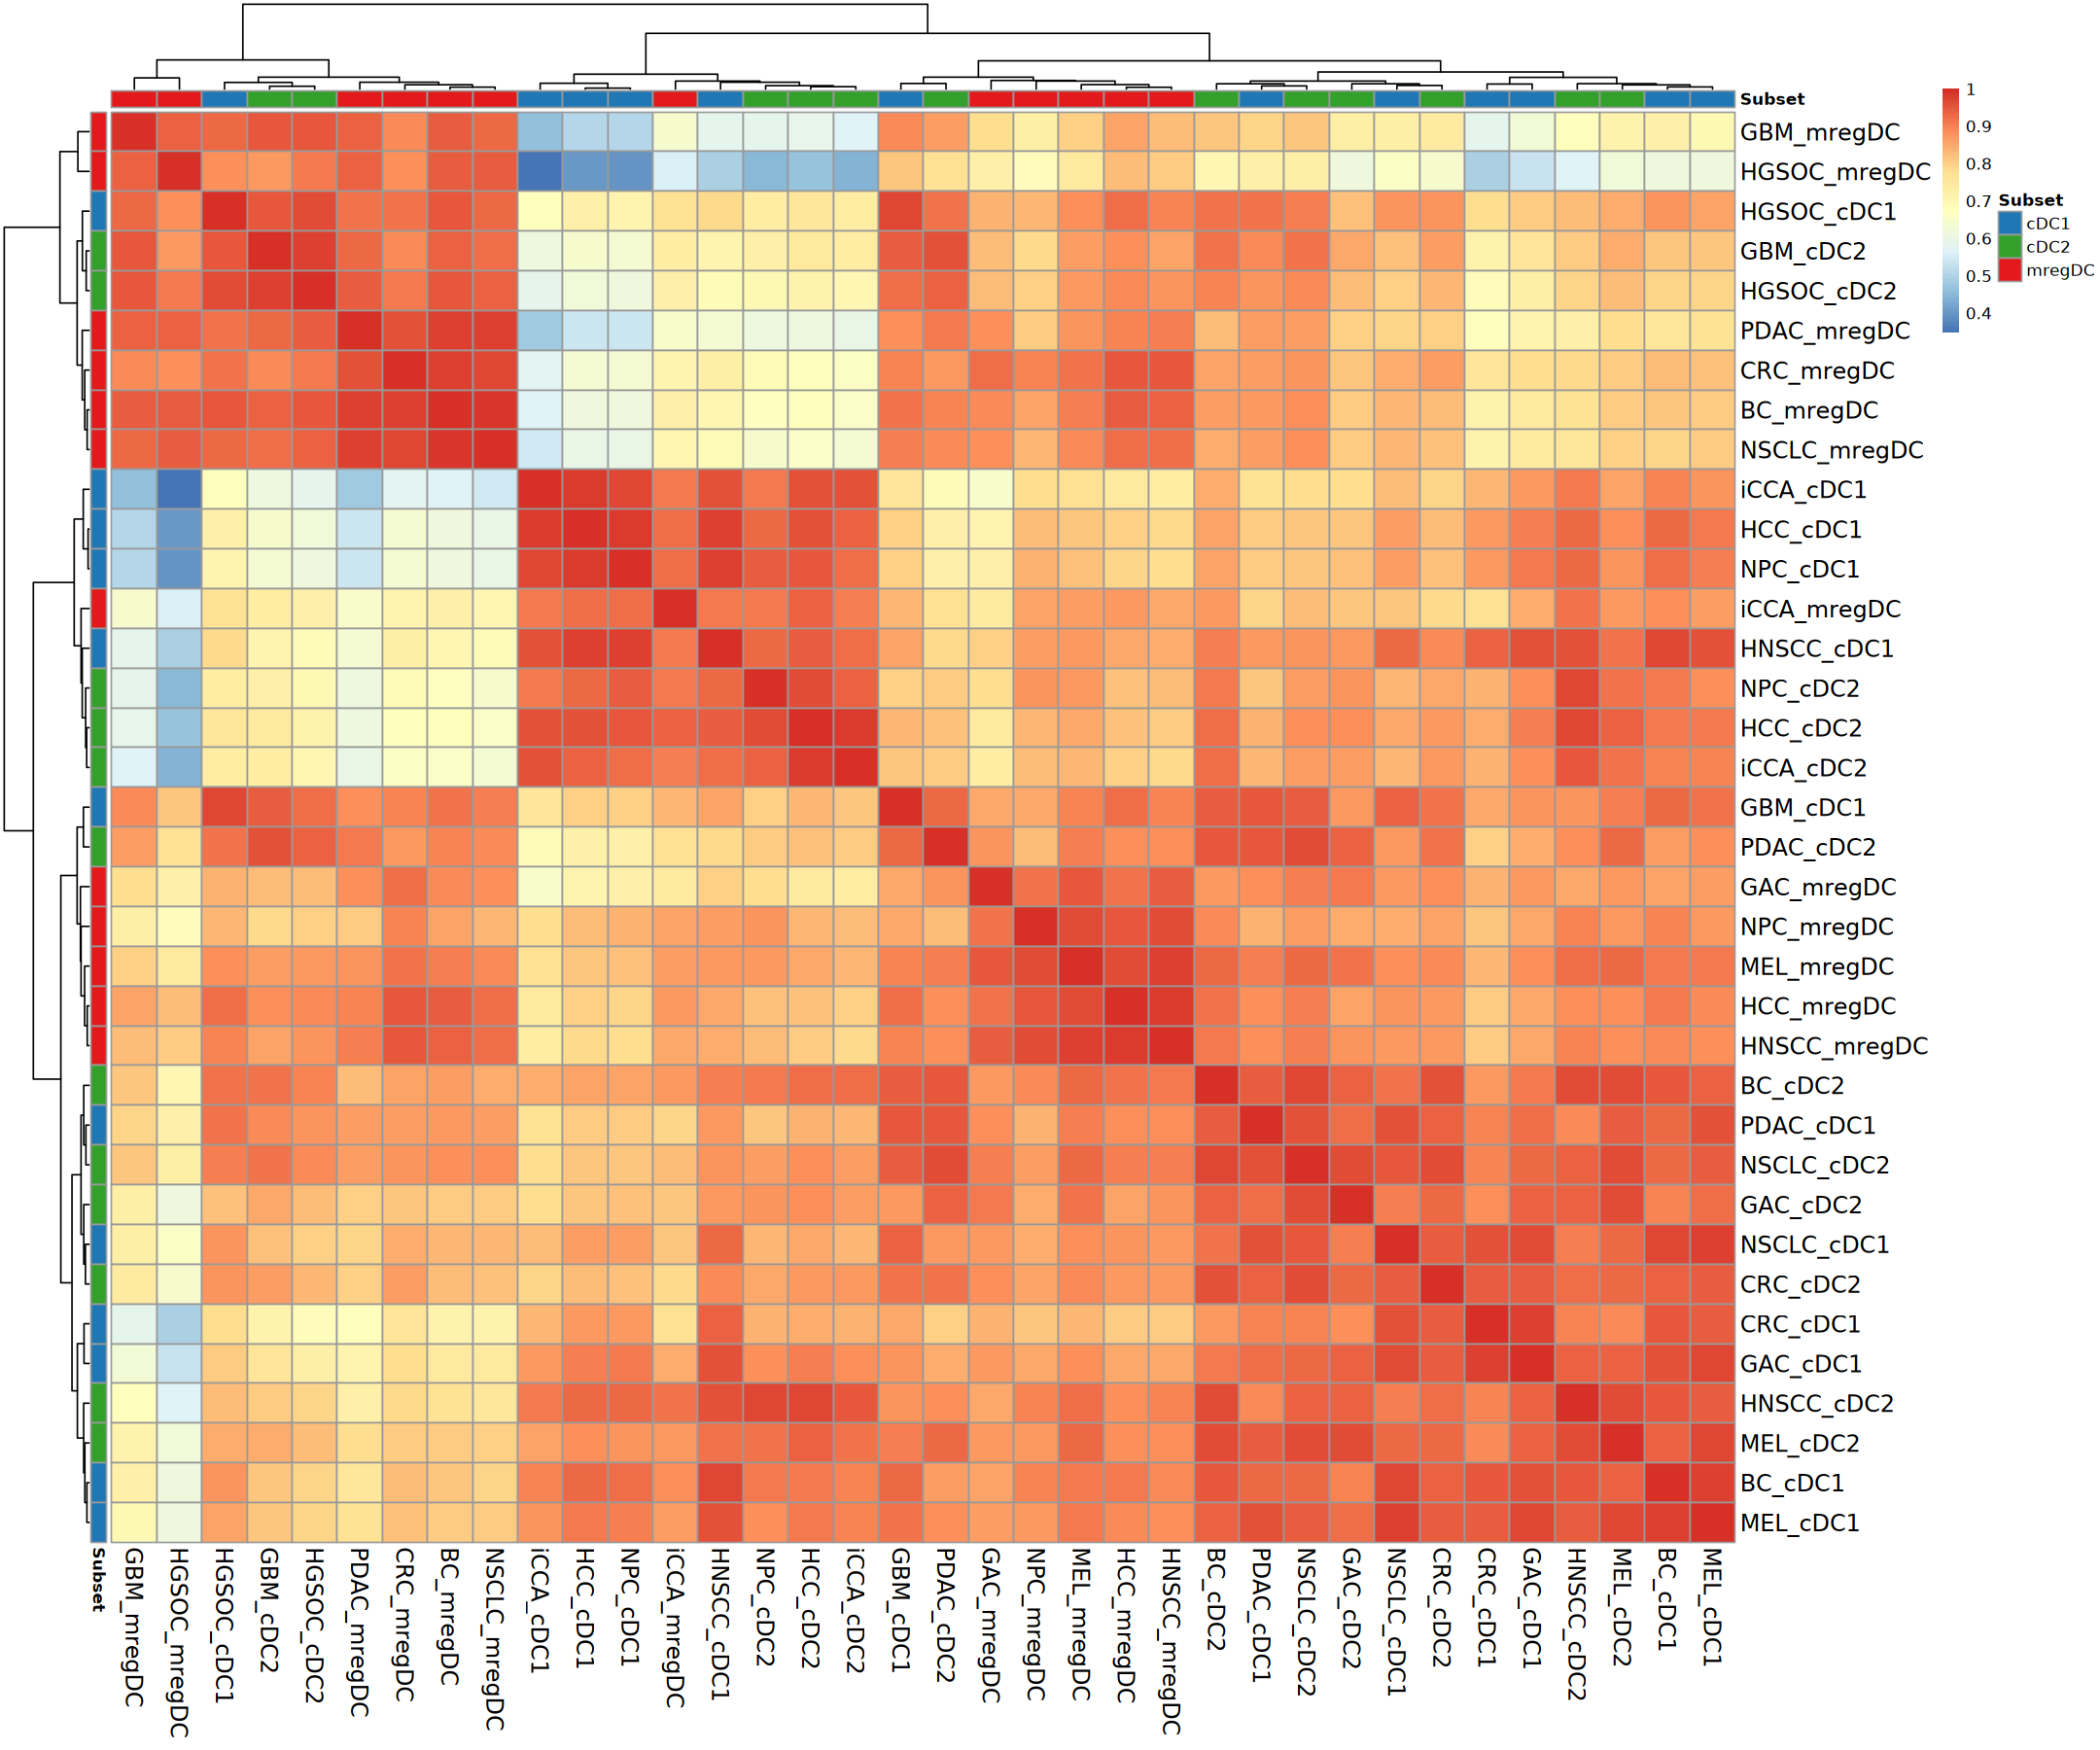

In [61]:
options(repr.plot.height=15, repr.plot.width=18)
pheatmap(cor_mat,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "ward.D2",
         fontsize_row = 14,
         fontsize_col = 14,
         annotation_col = cor_info,
         annotation_row = cor_info,
         annotation_colors = cor_colors)